# Projet Snooky Deep learning

<img src='snooky.jpg'>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import random
import csv

from PIL import Image
from tensorflow import keras
from tensorflow.keras import  Input, layers, utils
from tensorflow.keras.models import  Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from fonctions_reseau_neurone  import dataset_preprocessing, model_presentation, prediction_dog_race
from pretty_confusion_matrix import pp_matrix_from_data


2022-05-16 17:55:58.969955: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-16 17:55:58.969978: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


 ## Importation des données

Le dataset est constitué de deux sous dossiers (dataset) : train (jeu d'entrainement) et test (jeu de test).
Importation des images de race de chien en fonction de sa race et vérification du nombre d'image en fonction de la race de chien et du type de dataset.

In [7]:
base_dir = 'dataset_dogs'

In [18]:
train_dir_chihuahua = os.path.join(base_dir,'train/Chihuahua')

In [19]:
train_dir_labrador = os.path.join(base_dir,'train/Labrador_retriever')

In [20]:
train_dir_husky = os.path.join(base_dir,'train/Siberian_husky')

In [16]:
test_dir_chihuahua = os.path.join(base_dir,'test/Chihuahua')

In [13]:
test_dir_labrador = os.path.join(base_dir,'test/Labrador_retriever')

In [14]:
test_dir_husky = os.path.join(base_dir,'test/Siberian_husky')

In [24]:
print('Le nombre total image de chihuahua pour le dataset entrainement : ',len(os.listdir(train_dir_chihuahua)))

Le nombre total image de chihuahua pour le dataset entrainement :  100


In [25]:
print('Le nombre total image de labrador pour le dataset entrainement : ',len(os.listdir(train_dir_labrador)))

Le nombre total image de labrador pour le dataset entrainement :  100


In [26]:
print('Le nombre total image de husky pour le dataset entrainement : ',len(os.listdir(train_dir_husky)))

Le nombre total image de husky pour le dataset entrainement :  100


In [28]:
print('Le nombre total image de chihuahua pour le dataset de test : ',len(os.listdir(test_dir_chihuahua)))

Le nombre total image de chihuahua pour le dataset de test :  19


In [29]:
print('Le nombre total image de labrador pour le dataset de test : ',len(os.listdir(test_dir_labrador)))

Le nombre total image de labrador pour le dataset de test :  19


In [30]:
print('Le nombre total image de husky pour le dataset de test : ',len(os.listdir(test_dir_husky)))

Le nombre total image de husky pour le dataset de test :  19


In [31]:
print('Le nombre total image dans le dataset entrainement : ', len(os.listdir(train_dir_chihuahua))+len(os.listdir(train_dir_labrador))+len(os.listdir(train_dir_husky)))

Le nombre total image dans le dataset entrainement :  300


In [32]:
print('Le nombre total image dans le dataset de test : ', len(os.listdir(test_dir_chihuahua))+len(os.listdir(test_dir_labrador))+len(os.listdir(test_dir_husky)))

Le nombre total image dans le dataset de test :  57


# Préprocessing

On va redimenssionner les images en 128*128 pixels pour pouvoir les données comme entrée au cnn.

In [8]:
IMG_HEIGHT = 128
IMG_WIDTH = 128 
COLOR_DEPTH = 3
BATCH_SIZE = 64


Création du dataset d'entraînement
Found 300 files belonging to 3 classes.
Using 240 files for training.

Création du dataset de validation
Found 300 files belonging to 3 classes.
Using 60 files for validation.

Création du dataset de test
Found 57 files belonging to 3 classes.

Les classes à déterminer :  ['Chihuahua', 'Labrador_retriever', 'Siberian_husky']

Affichage des 5 première images du dataset d'entraînement

(64, 128, 128, 3)
(64,)
image_batch est un  tensor de forme (64, 128, 128, 3). Il s'agit  d'un batch de 64 images de forme 128x128x3(la dernière dimension correspond à la colorisation RGB). Le label_batch est un tensor de forme (64,), Il correspond au labels des 64 images


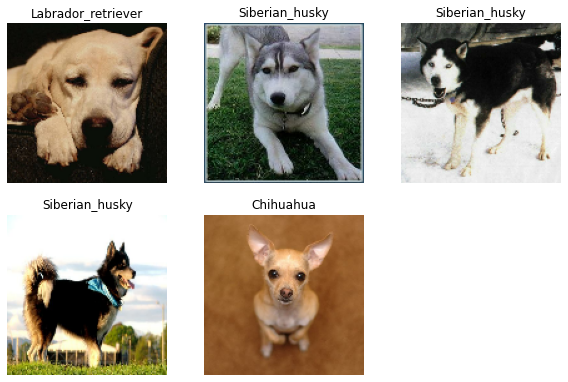

In [9]:
result = dataset_preprocessing(base_dir, BATCH_SIZE,IMG_HEIGHT, IMG_WIDTH, COLOR_DEPTH)
train_ds = result[0]
val_ds = result[1]
test_ds = result[2]
class_names = result[3]


Sauvegarde des catégories (race de chien) dans un fichier csv.

In [10]:

with open('dog_breed.csv', 'w') as f:      
    csv.writer(f).writerow(class_names)

# Modèle du réseau de neurones

Réalisation d'un réseau de neuronnes de types cnn avec une data augmentation.

In [ ]:
input_tensor = Input(shape = (IMG_WIDTH,IMG_HEIGHT,COLOR_DEPTH))
#data augmentation
x = layers.RandomFlip("horizontal_and_vertical")(input_tensor)
x = layers.RandomRotation(0.2)(x)
x = layers.RandomContrast(0.2)(x)
x = layers.RandomZoom(0.3)(x)
#fin du data augmentation
x = layers.Rescaling(1./255)(x) #(input_tensor)
x = layers.Conv2D(32, (3,3),padding = "same", activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv2D(32, (3,3), activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv2D(32, (3,3), activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
#output_tensor = layers.Dense(num_classes)(x)
output_tensor = layers.Dense(3, activation="softmax")(x)

model = Model(input_tensor, output_tensor)

Utilisation de la fonction model_presentation pour avoir les performances du cnn sur le dataset d'entraîment avec le modele définis ci dessus

In [ ]:
model_presentation(model,train_ds, val_ds,20,keras.optimizers.Adam(learning_rate=0.0001) , tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


# Prédiction d'une race de chien à partir du réseau de neuronne entraîné

Prédiction sur une images de chien prise au hasard dans le testset.

In [ ]:
prediction_dog_race(model, base_dir, class_names,  IMG_HEIGHT, IMG_WIDTH)

# Data augmentation sur une image

In [ ]:
path_directory = os.path.join(base_dir,'test')
dog_race_random = random.choice(os.listdir(path_directory))
path_directory_race = path_directory+'/'+dog_race_random
picture_random = random.choice(os.listdir(path_directory_race))
path_image = path_directory_race+'/'+picture_random
img = Image.open(path_image)
display(img)
img_array2 = np.array(img.resize((IMG_HEIGHT,IMG_WIDTH)))
img_array2.shape
img_array2
img_array2 = np.expand_dims(img_array2, axis=0)
print(img_array2.shape)
# Expanding dimension to one sample
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])

# Creating an iterator for data augmentation
it = datagen.flow(img_array2, batch_size=1)

# Preparing the Samples and Plot for displaying output
for i in range(9):
	# preparing the subplot
	plt.subplot(330 + 1 + i)
	# generating images in batches
	batch = it.next()
	# Remember to convert these images to unsigned integers for viewing 
	image = batch[0].astype('uint8')
	# Plotting the data
	plt.imshow(image)
# Displaying the figure
plt.show()

# Utilisation d'un réseau de neurone pré-entraîner

## MobileNetV2

In [20]:
IMG_SHAPE = (IMG_HEIGHT,IMG_WIDTH) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')



In [21]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)


(64, 4, 4, 1280)


In [22]:
base_model.trainable  =  True


In [23]:
base_model.summary()


Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [24]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)


(64, 1280)


In [25]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)


(64, 1)


In [26]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input


In [28]:
input_tensor = Input(shape = (IMG_WIDTH,IMG_HEIGHT,COLOR_DEPTH))
x = layers.RandomFlip("horizontal_and_vertical")(input_tensor)
x = layers.RandomRotation(0.2)(x)
x = layers.RandomContrast(0.2)(x)
x = layers.RandomZoom(0.3)(x)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = layers.Dropout(0.1)(x)
#output_tensor = prediction_layer(x)
output_tensor = layers.Dense(3, activation="softmax")(x)
modelmobilnet = tf.keras.Model(input_tensor, output_tensor)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 random_flip (RandomFlip)    (None, 128, 128, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 128, 128, 3)      0         
 tion)                                                           
                                                                 
 random_contrast (RandomCont  (None, 128, 128, 3)      0         
 rast)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 128, 128, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 128, 128, 3)      0     

/home/maison/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


4/4 [==============================] - 19s 3s/step - loss: 1.2347 - accuracy: 0.4625 - val_loss: 0.6714 - val_accuracy: 0.7833
Epoch 2/20
4/4 [==============================] - 9s 2s/step - loss: 0.7097 - accuracy: 0.6875 - val_loss: 0.5554 - val_accuracy: 0.7500
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 0.5970 - accuracy: 0.7625 - val_loss: 0.4145 - val_accuracy: 0.8000
Epoch 4/20
4/4 [==============================] - 9s 2s/step - loss: 0.5022 - accuracy: 0.7750 - val_loss: 0.2982 - val_accuracy: 0.8667
Epoch 5/20
4/4 [==============================] - 9s 2s/step - loss: 0.4866 - accuracy: 0.8000 - val_loss: 0.2369 - val_accuracy: 0.9000
Epoch 6/20
4/4 [==============================] - 9s 2s/step - loss: 0.4541 - accuracy: 0.8000 - val_loss: 0.2942 - val_accuracy: 0.8833
Epoch 7/20
4/4 [==============================] - 9s 2s/step - loss: 0.5106 - accuracy: 0.8167 - val_loss: 0.3369 - val_accuracy: 0.8500
Epoch 8/20
4/4 [==============================] - 9

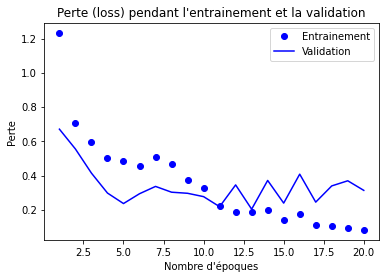

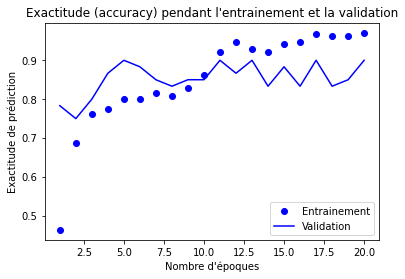

In [29]:
model_presentation(modelmobilnet, train_ds, val_ds, 20, tf.keras.optimizers.Adam(learning_rate=0.0001), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

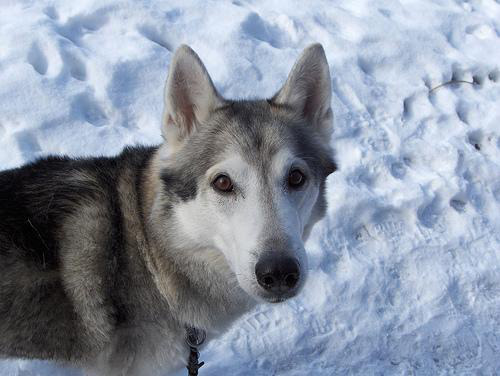

(1, 128, 128, 3)
[[2.2471698e-04 5.1474417e-05 9.9972373e-01]]
Siberian_husky

La race de chien est:Siberian_husky 
L'ordinateur a prédit : Siberian_husky


In [36]:
prediction_dog_race(modelmobilnet, base_dir, class_names,  IMG_HEIGHT, IMG_WIDTH)

Sauvegarde du modèle mobilnet

In [37]:
modelmobilnet.save('mobilnet_model.h5')

# Vgg16

In [ ]:
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)
base_model=tf.keras.applications.VGG16(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

In [ ]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

In [ ]:
base_model.trainable=False

In [ ]:
base_model.summary()


In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

In [ ]:
input_tensor = Input(shape = (IMG_WIDTH,IMG_HEIGHT,COLOR_DEPTH))
x = layers.RandomFlip("horizontal_and_vertical")(input_tensor)
x = layers.RandomRotation(0.2)(x)
x = layers.RandomContrast(0.2)(x)
x = layers.RandomZoom(0.3)(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
#output_tensor = prediction_layer(x)
output_tensor = layers.Dense(3, activation="softmax")(x)
modelvgg16 = tf.keras.Model(input_tensor, output_tensor)

In [ ]:
model_presentation(modelvgg16, train_ds, val_ds, 25, tf.keras.optimizers.Adam(learning_rate=0.0001), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

# Prédiction d'image à partir du modèle chargé

Chargement du modèle mobilnet_model basé sur le mobilnet.

In [4]:
model = load_model("mobilnet_model.h5")

2022-05-16 17:57:58.048635: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-16 17:57:58.048669: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-16 17:57:58.048691: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (maison-Inspiron-5567): /proc/driver/nvidia/version does not exist
2022-05-16 17:57:58.048895: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Prédiction de race de chien sur les images du test set avec le modèle chargé.

Création du test set et du tableau qui contient les races de chiens sous forme numérique :
* 0 correspond à chihuahua
* 1 correspond à labrador
* 2 correspond à husky


[0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0]


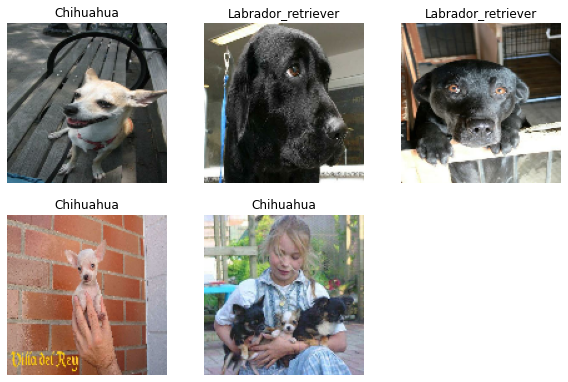

In [17]:
dogs_race_number = []
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    for i in range(len(os.listdir(test_dir_chihuahua))+len(os.listdir(test_dir_labrador))+len(os.listdir(test_dir_husky))): #len(os.listdir(test_dir_chihuahua))+len(os.listdir(test_dir_labrador))+len(os.listdir(test_dir_husky)) correspond au nombre d'image dans le test set
        dogs_race_number.append((labels[i]).numpy()) 


print(dogs_race_number)

Prédiction des races de chiens contenus dans le dataset de test grâce au mobilnet et retourne un numpy array qui contient la probabilité de la race pour une image donnée.

In [18]:
preds = model.predict(test_ds)
print(preds)

[[6.88622007e-04 9.99267757e-01 4.36380797e-05]
 [1.04222801e-02 9.89530325e-01 4.74194458e-05]
 [5.97368171e-06 9.99991894e-01 2.18138916e-06]
 [4.89499032e-01 1.28856173e-03 5.09212434e-01]
 [1.66430150e-03 1.85014826e-04 9.98150647e-01]
 [9.88163173e-01 1.07883429e-02 1.04851136e-03]
 [3.51666095e-05 9.99948978e-01 1.59083356e-05]
 [9.99963999e-01 3.37676975e-05 2.30375076e-06]
 [8.69212206e-03 1.59926107e-03 9.89708602e-01]
 [8.90226722e-01 1.04113586e-01 5.65980980e-03]
 [9.99937534e-01 5.78374020e-05 4.61830496e-06]
 [6.29646424e-03 3.47500172e-04 9.93356109e-01]
 [9.99088526e-01 8.00160808e-04 1.11332709e-04]
 [5.89161027e-05 9.99758661e-01 1.82474672e-04]
 [1.11503405e-02 2.19839066e-02 9.66865838e-01]
 [4.38497752e-01 5.03575921e-01 5.79264052e-02]
 [7.06970386e-05 9.99874234e-01 5.50557052e-05]
 [4.30586994e-01 5.66929996e-01 2.48302449e-03]
 [2.55506689e-04 9.99733627e-01 1.08984632e-05]
 [6.84044426e-05 9.99830008e-01 1.01506077e-04]
 [9.70276058e-01 2.83088908e-02 1.415058

Création d'une liste qui contient la prédiction des races de chiens la plus probable 

In [19]:
prediction_race_dog = []
for prob in preds :
    prediction_race_dog.append(np.argmax(prob))

print(prediction_race_dog)



[1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 0, 1, 2, 0]


Génération de la matrice de confusion entre les races prédites et les vrais races

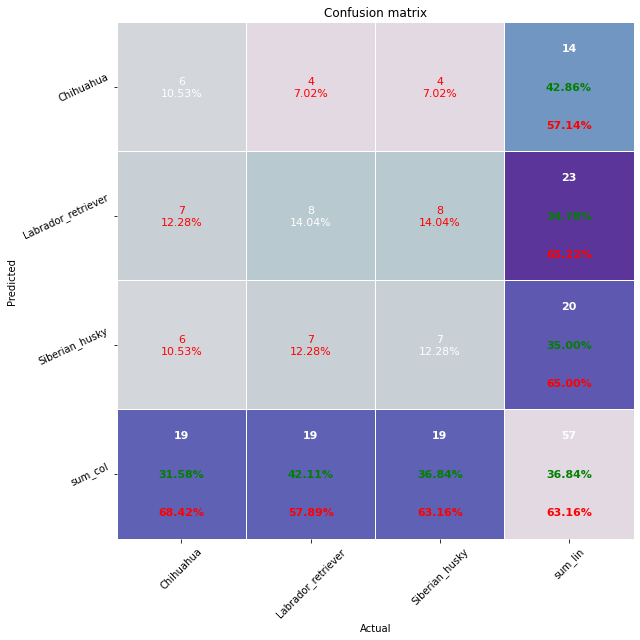

In [27]:

pp_matrix_from_data(dogs_race_number, prediction_race_dog, cmap = 'twilight', cbar = True, columns = class_names)